# 1. Machine Learning Models on Original Data

This notebook implements some ML models in the original data.

## 1. Import Dependencies

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import randint
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## 2. Load, Normalize & Split the Data

In [20]:
# Load the x_minmax_scale dataset
X = pd.read_csv(r"/Users/michelhilg/Documents/Projects/steel-data-PCA-SMOTE/data/processed/0_features.csv")
X.head(5)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000


In [21]:
# Load the target dataset
y_df = pd.read_csv(r"/Users/michelhilg/Documents/Projects/steel-data-PCA-SMOTE/data/processed/2_target_categorical.csv")

# Flatten y to convert it to a 1D array
y = y_df.values.flatten()

In [22]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
# Normalize the features using MinMaxScaler
minmax_scaler = MinMaxScaler(feature_range =(0,1))
X_train = minmax_scaler.fit_transform(X_train)
X_test = minmax_scaler.transform(X_test)

In [24]:
# Convert normalized arrays to Pandas DataFrames
X_train_df = pd.DataFrame(X_train, columns=X.columns)  
X_test_df = pd.DataFrame(X_test, columns=X.columns)    
y_train_df = pd.DataFrame(y_train, columns=y_df.columns)  
y_test_df = pd.DataFrame(y_test, columns=y_df.columns)    

# Save train DataFrames to CSV files
X_train_df.to_csv(r"/Users/michelhilg/Documents/Projects/steel-data-PCA-SMOTE/data/processed/3_train_normalized.csv", index=False)
X_test_df.to_csv(r"/Users/michelhilg/Documents/Projects/steel-data-PCA-SMOTE/data/processed/4_test_normalized.csv", index=False)

# Save test DataFrames to CSV files
y_train_df.to_csv(r"/Users/michelhilg/Documents/Projects/steel-data-PCA-SMOTE/data/processed/5_train_targets.csv", index=False)
y_test_df.to_csv(r"/Users/michelhilg/Documents/Projects/steel-data-PCA-SMOTE/data/processed/6_test_targets.csv", index=False)

## 3. Machine Learning Models

Basic tecniques, more a model centric approach. Do not look until the data, only model and HPO.

### 3.1. KNN Classifier

In [25]:
# Fit the Data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate the performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.49      0.68      0.57        72
   Dirtiness       0.58      0.88      0.70         8
    K_Scatch       0.93      0.92      0.92        83
Other_Faults       0.78      0.60      0.68       143
      Pastry       0.57      0.41      0.48        29
      Stains       0.75      0.92      0.83        13
   Z_Scratch       0.76      0.90      0.82        41

    accuracy                           0.72       389
   macro avg       0.69      0.76      0.71       389
weighted avg       0.74      0.72      0.72       389



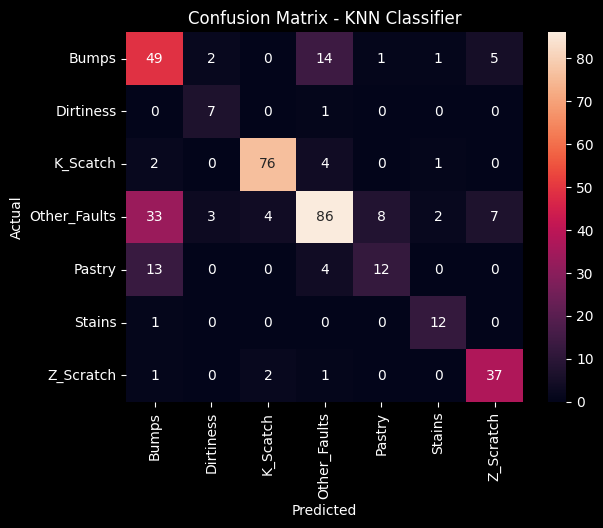

In [26]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get unique class labels from y_test
classes = np.unique(y_test)

# Create a heatmap using seaborn
plt.style.use("dark_background")
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN Classifier")
plt.show()

### 3.2. Random Forest

In [27]:
# Fit the data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate the performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.61      0.61      0.61        72
   Dirtiness       0.60      0.75      0.67         8
    K_Scatch       0.96      0.93      0.94        83
Other_Faults       0.71      0.75      0.73       143
      Pastry       0.58      0.48      0.53        29
      Stains       1.00      0.92      0.96        13
   Z_Scratch       0.90      0.88      0.89        41

    accuracy                           0.76       389
   macro avg       0.77      0.76      0.76       389
weighted avg       0.76      0.76      0.76       389



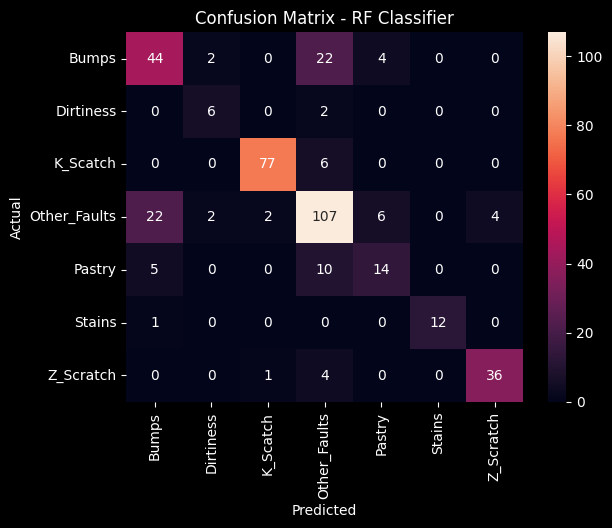

In [28]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get unique class labels from y_test
classes = np.unique(y_test)

# Create a heatmap using seaborn
plt.style.use("dark_background")
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RF Classifier")
plt.show()

## 4. Hyperparameter Tunning

In [29]:
param_dist = {'n_estimators': randint(50,750),
              'max_depth': randint(1,40)}

# Use random search to find the best hyperparameters
rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=20, 
                                 cv=20)

# Create a variable for the best model
rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 34, 'n_estimators': 292}


In [30]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.64      0.65      0.65        72
   Dirtiness       0.60      0.75      0.67         8
    K_Scatch       0.96      0.93      0.94        83
Other_Faults       0.74      0.80      0.77       143
      Pastry       0.65      0.45      0.53        29
      Stains       1.00      0.92      0.96        13
   Z_Scratch       0.95      0.90      0.93        41

    accuracy                           0.79       389
   macro avg       0.79      0.77      0.78       389
weighted avg       0.79      0.79      0.79       389



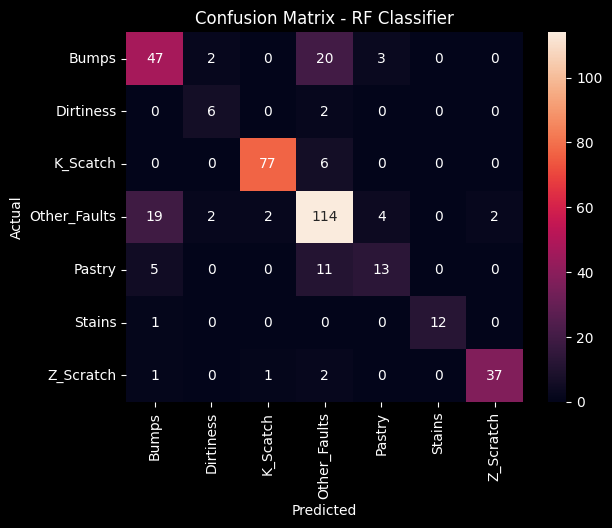

In [31]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
plt.style.use("dark_background")
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RF Classifier")
plt.show()